In [4]:
import pandas as pd
from vega_datasets import data

df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


Use the above dataset for the exercises below:

- Resample by the day and take the average temperature. Visualize the average temperature over time.
- Write the code necessary to visualize the minimum temperature over time.
- Write the code necessary to visualize the maximum temperature over time.
- Which month is the coldest, on average?
- Which month has the highest average temperature?
- Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
- Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [5]:
df.date = pd.to_datetime(df.date)
df = df.set_index("date")

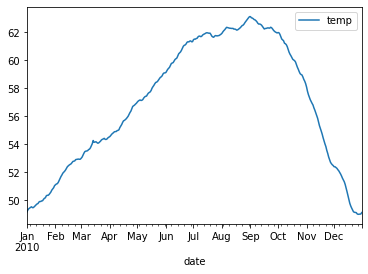

In [10]:
# Resample by the day and take the average temperature. 
# Visualize the average temperature over time.
df.resample("D").mean().plot()

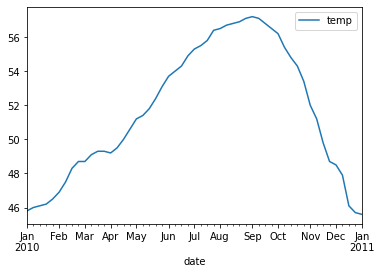

In [13]:
# Write the code necessary to visualize the minimum temperature over time.
df.resample("W").min().plot()

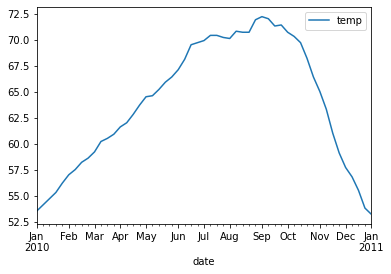

In [15]:
# Write the code necessary to visualize the maximum temperature over time.
df.resample("W").max().plot()

In [27]:
# Month with the lowest temperatures
average_temp_by_month = df.resample("M").temp.mean()
average_temp_by_month

date
2010-01-31    49.984140
2010-02-28    52.243899
2010-03-31    53.956528
2010-04-30    55.633056
2010-05-31    57.970968
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
2010-10-31    60.253091
2010-11-30    55.185139
2010-12-31    50.498253
Freq: M, Name: temp, dtype: float64

In [29]:
# Month with the lowest average monthly temperature
average_temp_by_month.idxmin().month_name()

'January'

In [ ]:
- Which month has the highest average temperature?


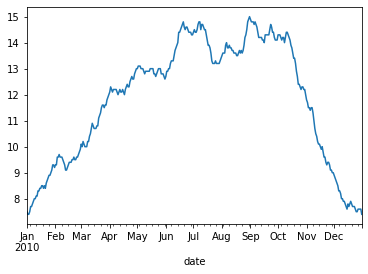

In [50]:
# Range between high and low temperature
daily_ranges = df.resample("D").temp.agg(["min", "max"])

(daily_ranges["max"] - daily_ranges["min"]).plot()

In [54]:
df.resample("D").mean(), df.resample("D").min()

(                 temp
 date                 
 2010-01-01  49.170833
 2010-01-02  49.304167
 2010-01-03  49.391667
 2010-01-04  49.445833
 2010-01-05  49.491667
 ...               ...
 2010-12-27  48.991667
 2010-12-28  49.000000
 2010-12-29  49.012500
 2010-12-30  49.012500
 2010-12-31  49.116667
 
 [365 rows x 1 columns],
             temp
 date            
 2010-01-01  45.8
 2010-01-02  46.0
 2010-01-03  46.1
 2010-01-04  46.1
 2010-01-05  46.1
 ...          ...
 2010-12-27  45.6
 2010-12-28  45.6
 2010-12-29  45.6
 2010-12-30  45.6
 2010-12-31  45.8
 
 [365 rows x 1 columns])

In [55]:
lows = df.resample("D").min()
highs = df.resample("D").max()
averages = df.resample("D").mean()

import matplotlib.pyplot as plt

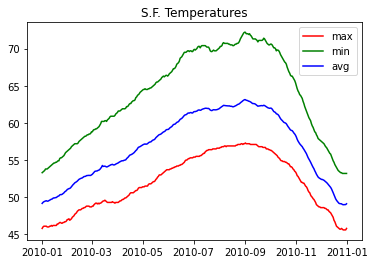

In [72]:
plt.title("S.F. Temperatures")
plt.plot(lows, color='red')
plt.plot(highs, color="green")
plt.plot(averages, color="blue")
plt.legend(["max", "min", "avg"])